# The Sparks Foundation (Data Science & Business Analytics Task)
# Task 1
# Prediction Using Supervised ML

Task 1 : Predict the percentage of an student based on the no. of study hours. What will be the predicted score if a student studies for 9.25 hrs/day

<h3>Created By :- Kshitij Barnwal</h3>

# Step 1: Importing the Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

sns.set_style("darkgrid")

# Step 2 : Importing the Dataset

In [2]:
raw_data = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(raw_data)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


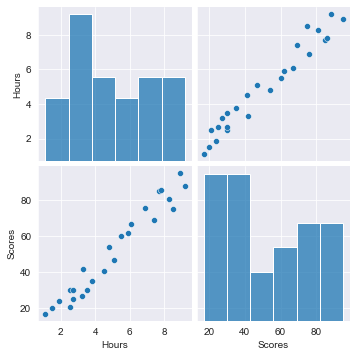

In [7]:
sns.pairplot(df)

<Figure size 504x504 with 0 Axes>

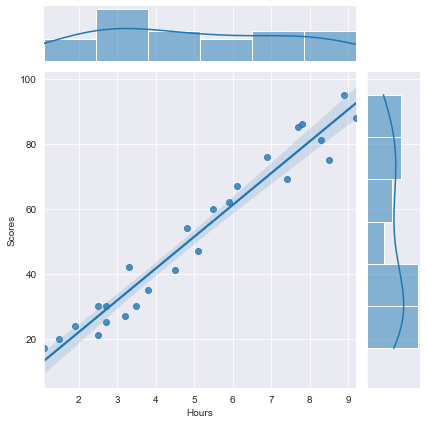

In [8]:
plt.figure(figsize=(7,7))
sns.jointplot(x='Hours',y='Scores',data=df,kind='reg')

# Data Preprocessing

In [9]:
df.shape

(25, 2)

In [10]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

# Train Test Split
#### Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=101)

## Creating and Training the Model

In [12]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print("Training is Completed")

Training is Completed


In [13]:
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [9.7378733]
Intercept: 
 2.23868733140732


In [14]:
m = regr.coef_
c = regr.intercept_

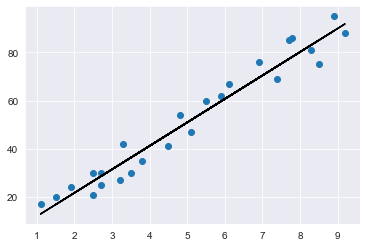

In [15]:
line = m*X + c

plt.scatter(X, y)
plt.plot(X, line, color='black');
plt.show()

# Predictions from our Model
#### Let's grab predictions off our test set and see how well it did!

In [16]:
pred = regr.predict(X_test)

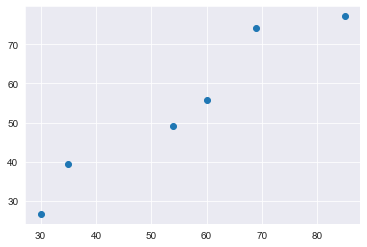

In [17]:
plt.scatter(y_test,pred)

In [18]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})  
df 

,Actual,Predicted
0,30,26.583371
1,85,77.220312
2,35,39.242606
3,69,74.298950
4,60,55.796990
5,54,48.980479


In [19]:
print("Training Score:",regr.score(X_train,y_train))
print("Test Score:",regr.score(X_test,y_test))

Training Score: 0.9567140022966721
Test Score: 0.9248956617931599


In [20]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regr.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.31401533894112


In [21]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R^2:', metrics.r2_score(y_test, pred))

MAE: 4.993400610790995
MSE: 26.85605960379593
RMSE: 5.182283242335942
R^2: 0.9248956617931599
